# 6.1 매개변수 갱신

In [2]:
optimization: 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것. 이러한 문제를 푸는 것을 optimization이라고 함.
SGD: 

SyntaxError: invalid syntax (684434958.py, line 1)

## 6.1.1 모험가 이야기

## 6.1.2 확률적 경사 하강법(SGD)

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

## 6.1.3 SGD의 단점

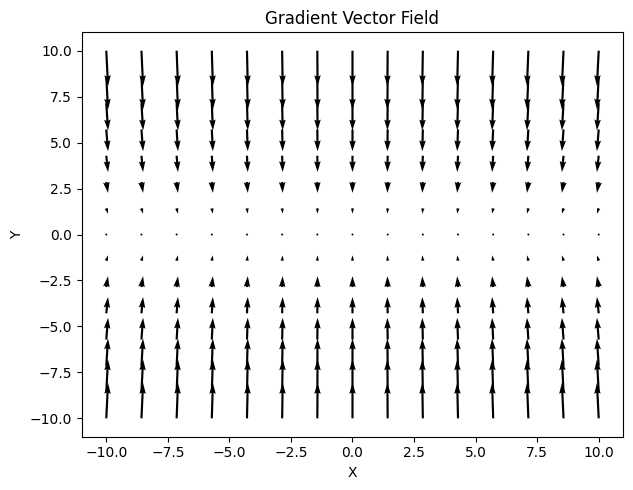

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_gradient(func, x_range=(-10, 10), y_range=(-10, 10), num_points=15):
    # 그리드 생성
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)

    # 함수 값과 기울기 계산
    Z = func(X, Y)
    dx, dy = np.gradient(Z)

    # 기울기 벡터장
    fig = plt.figure(figsize=(12, 5))
    ax2 = fig.add_subplot(122)
    ax2.quiver(X, Y, -dy, -dx)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Gradient Vector Field')

    plt.tight_layout()
    plt.show()

# 예시 함수: f(x,y) = x^2 + y^2
def example_function(x, y):
    return 1/20*x**2 + y**2

# 시각화 실행
visualize_gradient(example_function)

## 6.1.4 모멘텀

In [17]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key, val in params.items():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

## 6.1.5 AdaGrad

In [ ]:
learning rate decay

In [18]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key, val in params.items():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + 1e-7)

## 6.1.6 Adam

In [19]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

## 6.1.7 어느 갱신 방법을 이용할 것인가?

## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

# 6.2 가중치의 초깃값

## 6.2.1 초기값을 0으로 하면?

In [21]:
"weight decay"

'weight decay'

## 6.2.2 은닉층의 활성화값 분포

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

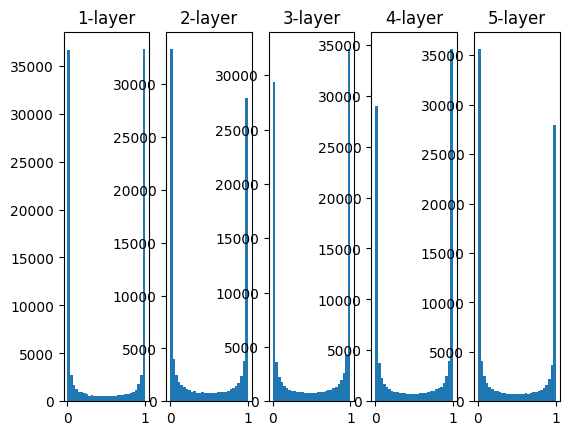

In [29]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

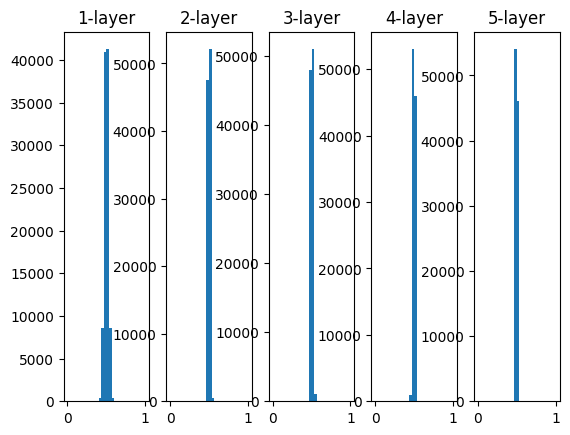

In [31]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

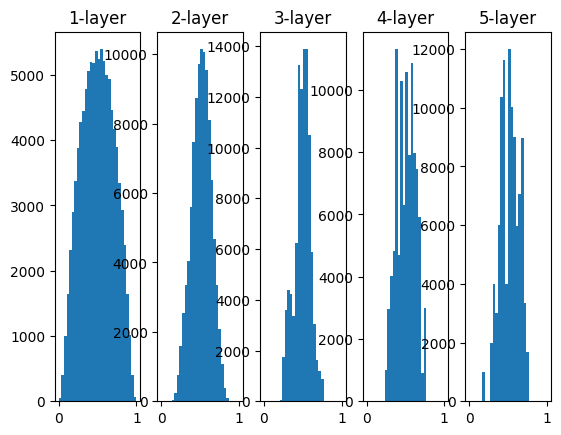

In [40]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.2.3 ReLU를 사용할 때의 가중치 초깃값

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    temp = x.copy()
    mask = (x < 0)
    temp[mask] = 0
    return temp

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / 100

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

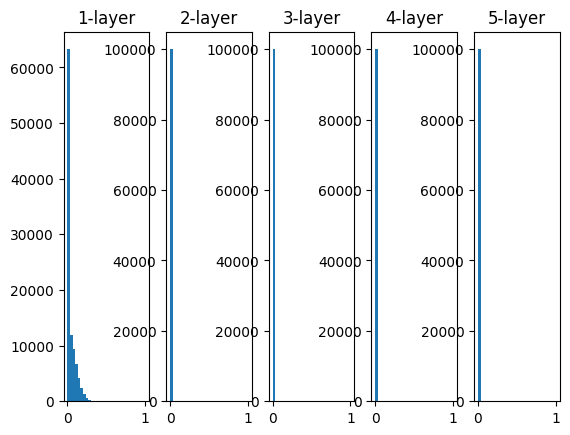

In [61]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    temp = x.copy()
    mask = (x < 0)
    temp[mask] = 0
    return temp

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

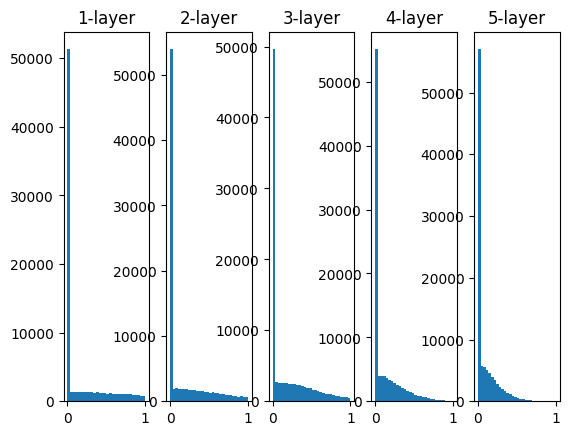

In [63]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    temp = x.copy()
    mask = (x < 0)
    temp[mask] = 0
    return temp

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num/2)

    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

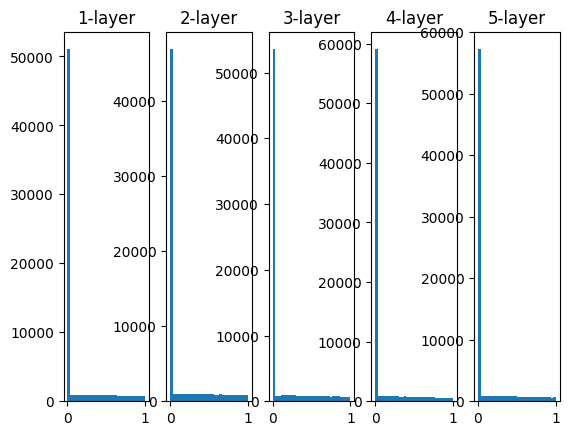

In [69]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

# 6.3 배치 정규화

### 6.3.1 배치 정규화 알고리즘

### 6.3.2 배치 정규화의 효과

# 6.4 바른 학습을 위해

### 6.4.1 오버피팅

In [ ]:
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

x_train, t_train = zip(*[(image, label) for image, label in train_dataset])
x_test, t_test = zip(*[(image, label) for image, label in test_dataset])

x_train, t_train = torch.stack(x_train).numpy(), torch.tensor(t_train).numpy()
x_test, t_test = torch.stack(x_test).numpy(), torch.tensor(t_test).numpy()

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size = [100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in tqdm(100000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    x_batch = x_batch.reshape(-1, 784)
    t_batch = np.eye(10)[t_batch]

    grad = network.gradient(x_batch, t_batch) # 성능 개선편?
    optimizer.update(network.params, grads)
    

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

### 6.4.2 가중치 감소

### 6.4.3 드롭아웃

In [70]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

# 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터

In [2]:
import numpy as np
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

x_train, t_train = zip(*[(image, label) for image, label in train_dataset])
x_test, t_test = zip(*[(image, label) for image, label in test_dataset])

x_train, t_train = torch.stack(x_train).numpy(), torch.tensor(t_train).numpy()
x_test, t_test = torch.stack(x_test).numpy(), torch.tensor(t_test).numpy()

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 하이퍼파라미터 최적화

### 6.5.3 하이퍼파라미터 최적화 구현하기

In [21]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

print(weight_decay)
print(lr)

1.5944148411985326e-05
0.004436099484185703
